# Script for live fetching weather data for 20 Indian cities and scheduling it

In [68]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
import schedule

In [69]:
cities = [
    {"name": "Mumbai", "lat": 19.076, "lon": 72.877},
    {"name": "Delhi", "lat": 28.704, "lon": 77.102},
    {"name": "Bangalore", "lat": 12.972, "lon": 77.594},
    {"name": "Hyderabad", "lat": 17.385, "lon": 78.487},
    {"name": "Chennai", "lat": 13.088, "lon": 80.278},
    {"name": "Kolkata", "lat": 22.572, "lon": 88.363},
    {"name": "Pune", "lat": 18.520, "lon": 73.856},
    {"name": "Ahmedabad", "lat": 23.023, "lon": 72.572},
    {"name": "Jaipur", "lat": 26.922, "lon": 75.809},
    {"name": "Lucknow", "lat": 26.847, "lon": 80.947},
    {"name": "Kochi", "lat": 9.931, "lon": 76.267},
    {"name": "Chandigarh", "lat": 30.733, "lon": 76.779},
    {"name": "Bhopal", "lat": 23.259, "lon": 77.412},
    {"name": "Indore", "lat": 22.720, "lon": 75.867},
    {"name": "Guwahati", "lat": 26.144, "lon": 91.736},
    {"name": "Nagpur", "lat": 21.146, "lon": 79.088},
    {"name": "Patna", "lat": 25.596, "lon": 85.138},
    {"name": "Srinagar", "lat": 34.086, "lon": 74.805},
    {"name": "Bhubaneswar", "lat": 20.296, "lon": 85.824},
    {"name": "Dehradun", "lat": 30.316, "lon": 78.032}
]


# Fetching logic for single time for all 20 cities

In [72]:
def fetch_weather_data():
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    all_data = []
    
    for city in cities:
        # Open-Meteo API call
        url = f"https://api.open-meteo.com/v1/forecast?latitude={city['lat']}&longitude={city['lon']}&current=temperature_2m,relative_humidity_2m,wind_speed_10m"
        
        try:
            response = requests.get(url)
            data = response.json()
            
            weather_data = {
                'city': city['name'],
                'datetime': current_time,
                'temperature': data['current']['temperature_2m'],
                'humidity': data['current']['relative_humidity_2m'],
                'wind_speed': data['current']['wind_speed_10m']
            }
            all_data.append(weather_data)
            print(f"Data collected for {city['name']}")
        except Exception as e:
            print(f"Error collecting data for {city['name']}: {e}")
    
    df = pd.DataFrame(all_data)
    print (df.head())
    try:
        df.to_csv('IndianCitiesWeather.csv', mode='a', header=not pd.io.common.file_exists('IndianCitiesWeather.csv'), index=False)
        print(f"Data saved to CSV at {current_time}")
    except Exception as e:
        print(f"Error saving to CSV: {e}")


In [79]:
fetch_weather_data()

Data collected for Mumbai
Data collected for Delhi
Data collected for Bangalore
Data collected for Hyderabad
Data collected for Chennai
Data collected for Kolkata
Data collected for Pune
Data collected for Ahmedabad
Data collected for Jaipur
Data collected for Lucknow
Data collected for Kochi
Data collected for Chandigarh
Data collected for Bhopal
Data collected for Indore
Data collected for Guwahati
Data collected for Nagpur
Data collected for Patna
Data collected for Srinagar
Data collected for Bhubaneswar
Data collected for Dehradun
        city             datetime  temperature  humidity  wind_speed
0     Mumbai  2025-03-10 11:34:34         33.7        38        10.5
1      Delhi  2025-03-10 11:34:34         29.4        41         4.4
2  Bangalore  2025-03-10 11:34:34         30.0        28        14.3
3  Hyderabad  2025-03-10 11:34:34         31.9        36        11.7
4    Chennai  2025-03-10 11:34:34         29.5        58        13.3
Data saved to CSV at 2025-03-10 11:34:34


# Below is a scheduling script for data fetching every 6 hours. Do not run it in the main thread

In [73]:
def setup_periodic_collection():
    # Schedule data collection every 6 hours
    schedule.every(6).hours.do(fetch_weather_data)
    
    # Run immediately for first data point
    fetch_weather_data()
    
    # Keep running the scheduled tasks
    while True:
        schedule.run_pending()
        time.sleep(60)  # Check every minute

if __name__ == "__main__":
    setup_periodic_collection()


Data collected for Mumbai
Data collected for Delhi
Data collected for Bangalore
Data collected for Hyderabad
Data collected for Chennai
Data collected for Kolkata
Data collected for Pune
Data collected for Ahmedabad
Data collected for Jaipur
Data collected for Lucknow
Data collected for Kochi
Data collected for Chandigarh
Data collected for Bhopal
Data collected for Indore
Data collected for Guwahati
Data collected for Nagpur
Data collected for Patna
Data collected for Srinagar
Data collected for Bhubaneswar
Data collected for Dehradun
        city             datetime  temperature  humidity  wind_speed
0     Mumbai  2025-03-10 11:26:20         34.2        36        11.0
1      Delhi  2025-03-10 11:26:20         29.6        39         4.6
2  Bangalore  2025-03-10 11:26:20         30.3        27        14.7
3  Hyderabad  2025-03-10 11:26:20         32.2        35        11.7
4    Chennai  2025-03-10 11:26:20         29.9        56        13.3
Data saved to CSV at 2025-03-10 11:26:20


KeyboardInterrupt: 

In [77]:
def analyze_data():
    df = pd.read_csv('IndianCitiesWeather.csv')
    
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # ----- TEMPERATURE ANALYSIS -----
    # Analyze average temperature by city
    avg_temp = df.groupby('city')['temperature'].mean().sort_values(ascending=False)
    
    # Visualize temperature
    plt.figure(figsize=(12, 6))
    avg_temp.plot(kind='bar', color='coral')
    plt.title('Average Temperature Across Indian Cities')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('avg_temperature.png')
    
    # ----- HUMIDITY ANALYSIS -----
    # Analyze average humidity by city
    avg_humidity = df.groupby('city')['humidity'].mean().sort_values(ascending=False)
    
    # Visualize humidity
    plt.figure(figsize=(12, 6))
    avg_humidity.plot(kind='bar', color='skyblue')
    plt.title('Average Humidity Across Indian Cities')
    plt.ylabel('Relative Humidity (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('avg_humidity.png')
    
    # ----- WIND SPEED ANALYSIS -----
    # Analyze average wind speed by city
    avg_wind = df.groupby('city')['wind_speed'].mean().sort_values(ascending=False)
    
    # Visualize wind speed
    plt.figure(figsize=(12, 6))
    avg_wind.plot(kind='bar', color='lightgreen')
    plt.title('Average Wind Speed Across Indian Cities')
    plt.ylabel('Wind Speed (km/h)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('avg_wind_speed.png')
    
    # ----- TIME SERIES ANALYSIS FOR MUMBAI -----
    city_data = df[df['city'] == 'Mumbai'].sort_values('datetime')
    
    # Temperature trend
    plt.figure(figsize=(14, 6))
    plt.plot(city_data['datetime'], city_data['temperature'], marker='o', color='coral')
    plt.title('Temperature Trend in Mumbai')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('mumbai_temp_trend.png')
    
    # Humidity trend
    plt.figure(figsize=(14, 6))
    plt.plot(city_data['datetime'], city_data['humidity'], marker='o', color='skyblue')
    plt.title('Humidity Trend in Mumbai')
    plt.xlabel('Date')
    plt.ylabel('Relative Humidity (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('mumbai_humidity_trend.png')
    
    # Wind speed trend
    plt.figure(figsize=(14, 6))
    plt.plot(city_data['datetime'], city_data['wind_speed'], marker='o', color='lightgreen')
    plt.title('Wind Speed Trend in Mumbai')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (km/h)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('mumbai_wind_trend.png')
    
    # ----- COMBINED PLOT FOR MUMBAI -----
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Temperature on primary y-axis
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color=color)
    ax1.plot(city_data['datetime'], city_data['temperature'], color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Humidity on secondary y-axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Humidity (%)', color=color)
    ax2.plot(city_data['datetime'], city_data['humidity'], color=color, marker='s')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Wind speed on tertiary y-axis (right side, offset)
    ax3 = ax1.twinx()
    # Offset the third axis
    ax3.spines["right"].set_position(("axes", 1.1))
    color = 'tab:green'
    ax3.set_ylabel('Wind Speed (km/h)', color=color)
    ax3.plot(city_data['datetime'], city_data['wind_speed'], color=color, marker='^')
    ax3.tick_params(axis='y', labelcolor=color)
    
    plt.title('Weather Parameters Trend in Mumbai')
    fig.tight_layout()
    plt.savefig('mumbai_combined_trend.png')


# Collecting historical data for a month and analysing it

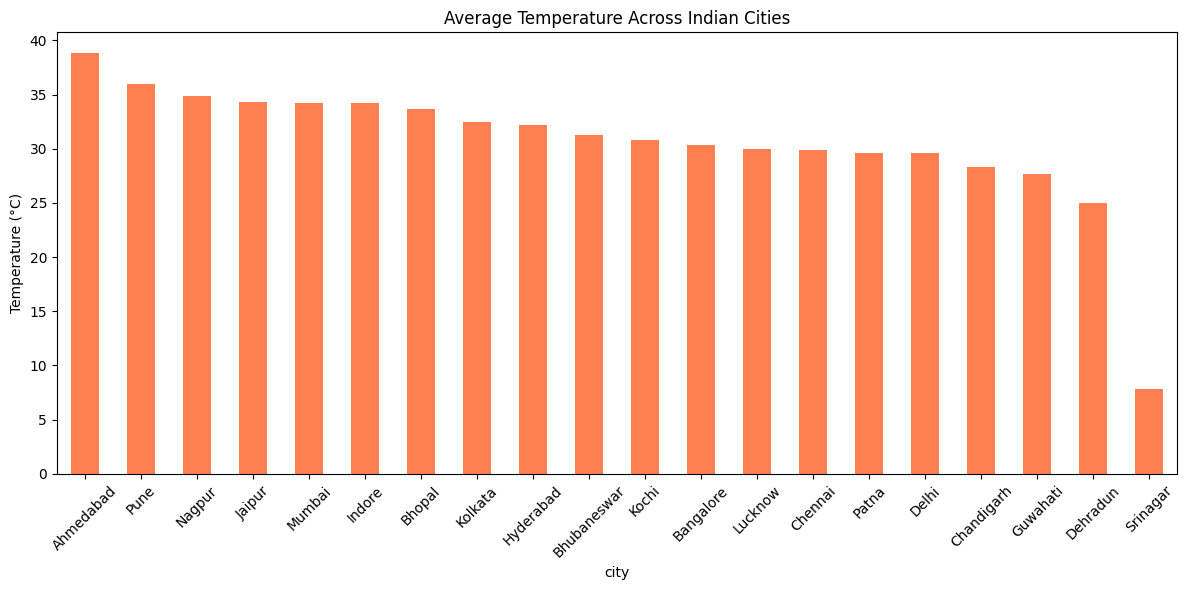

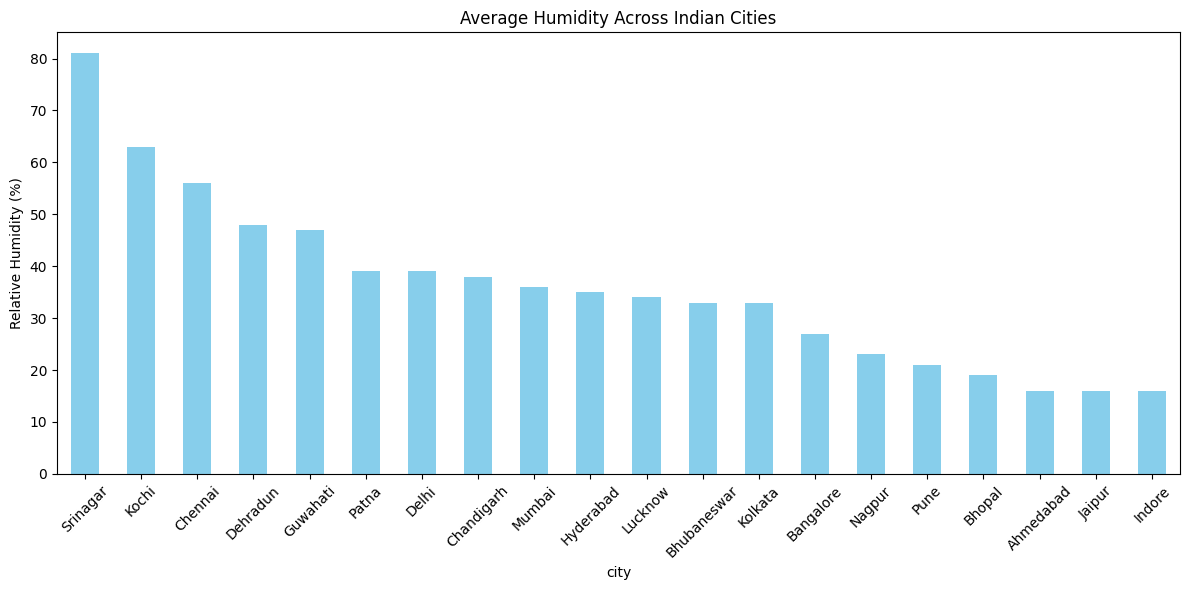

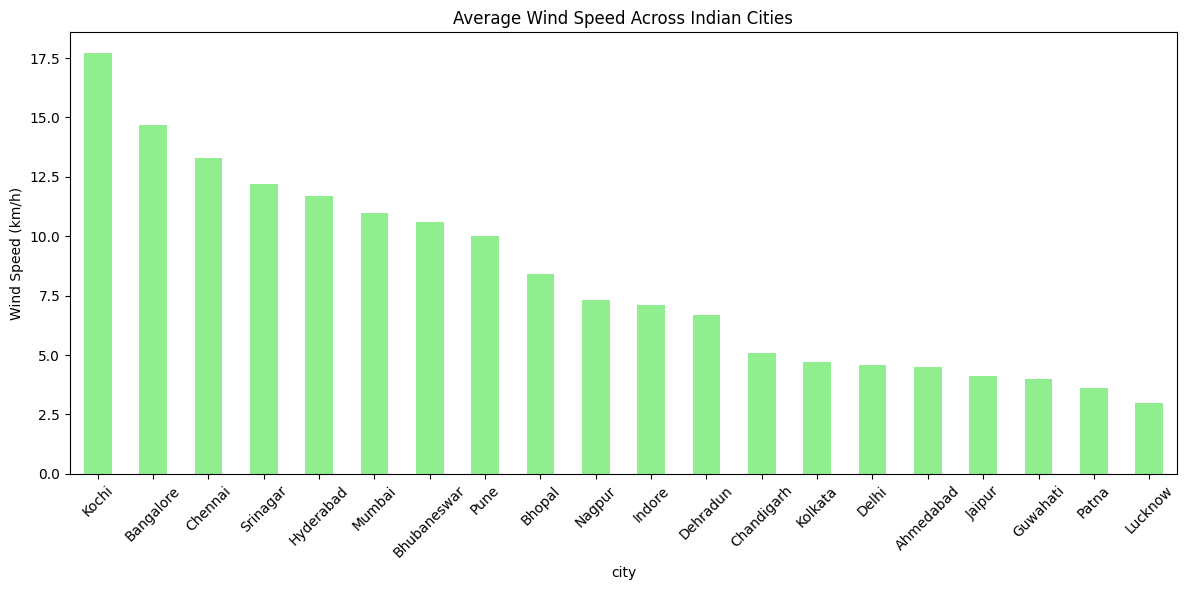

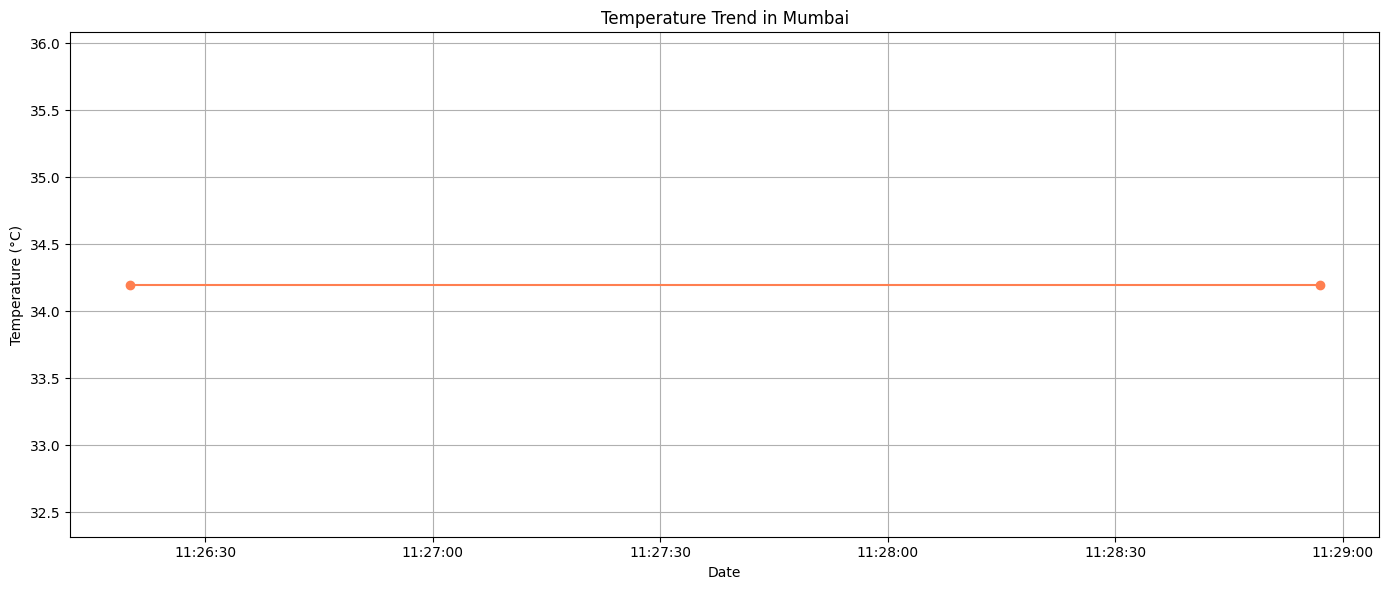

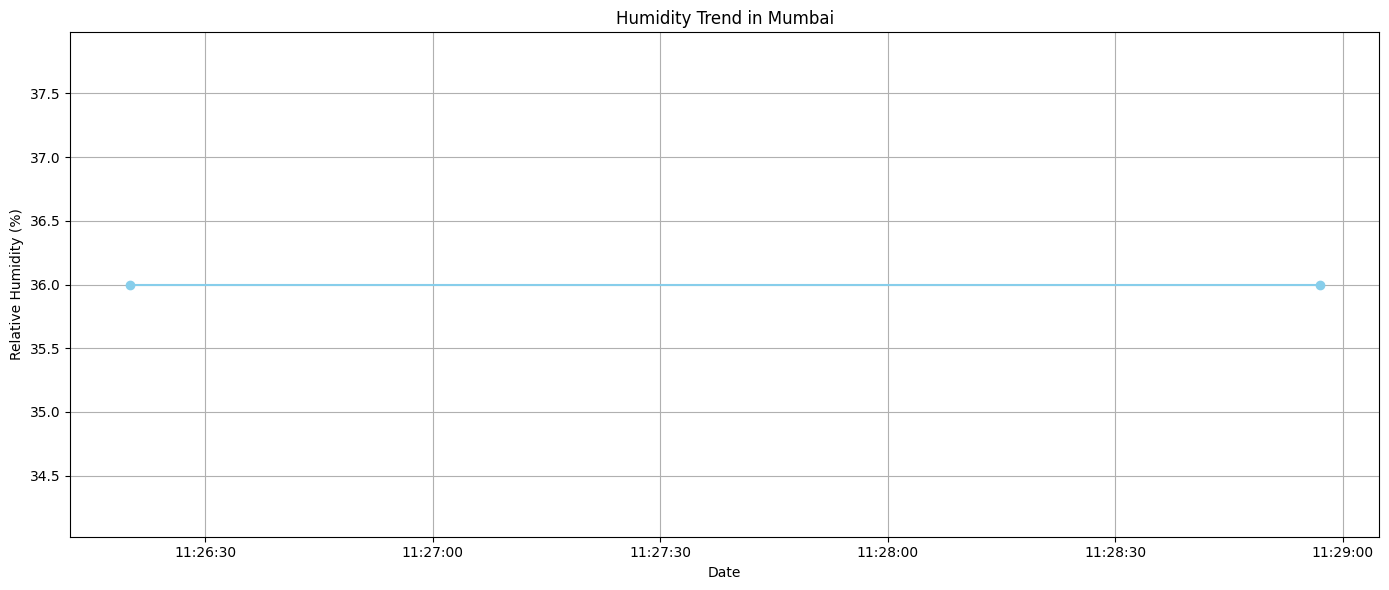

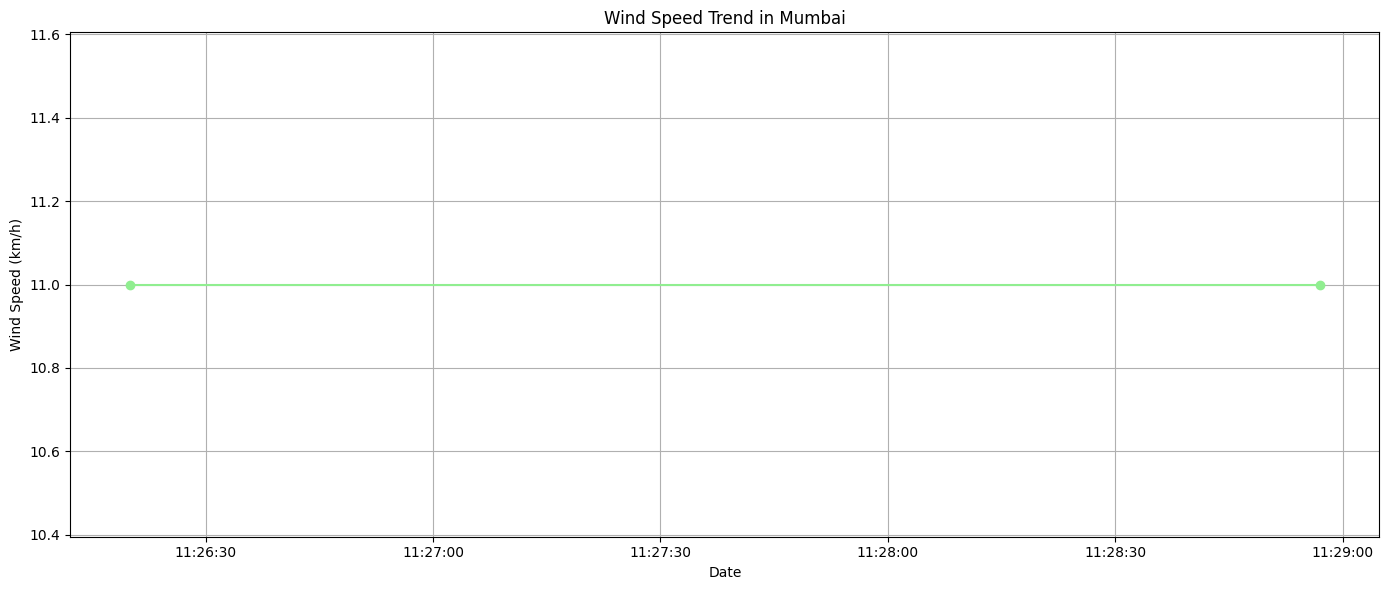

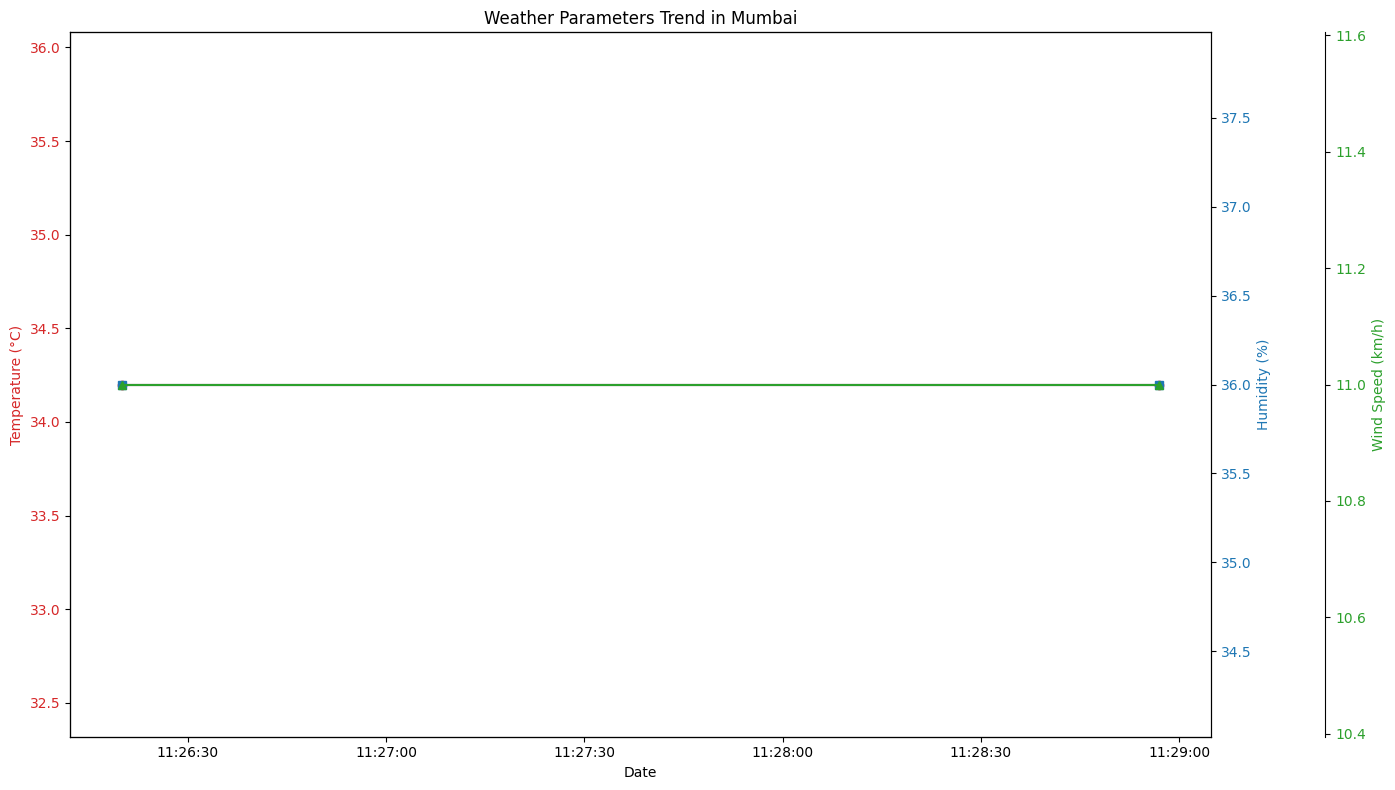

In [78]:
analyze_data()

# Extracting historical over a month and usign a simple Linear Regression for predicting tommorow's weather

In [86]:
# IndiaMeteoTrends-20: Historical Weather Data Collection and Linear Regression Forecast

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Starting historical data collection for 20 Indian cities...
Raw data saved to 'IndiaMeteoTrends-20.csv'

Preparing data for linear regression models...

Training linear regression models for each city...
Building models for Mumbai...
Building models for Delhi...
Building models for Bangalore...
Building models for Hyderabad...
Building models for Chennai...
Building models for Kolkata...
Building models for Pune...
Building models for Ahmedabad...
Building models for Jaipur...
Building models for Lucknow...
Building models for Kochi...
Building models for Chandigarh...
Building models for Bhopal...
Building models for Indore...
Building models for Guwahati...
Building models for Nagpur...
Building models for Patna...
Building models for Srinagar...
Building models for Bhubaneswar...
Building models for Dehradun...

Generating prediction visualizations...
Predictions saved to 'IndiaMeteoTrends-20_NextDayPredictions.csv'
Model performance metrics saved to 'model_performance_metrics.csv'


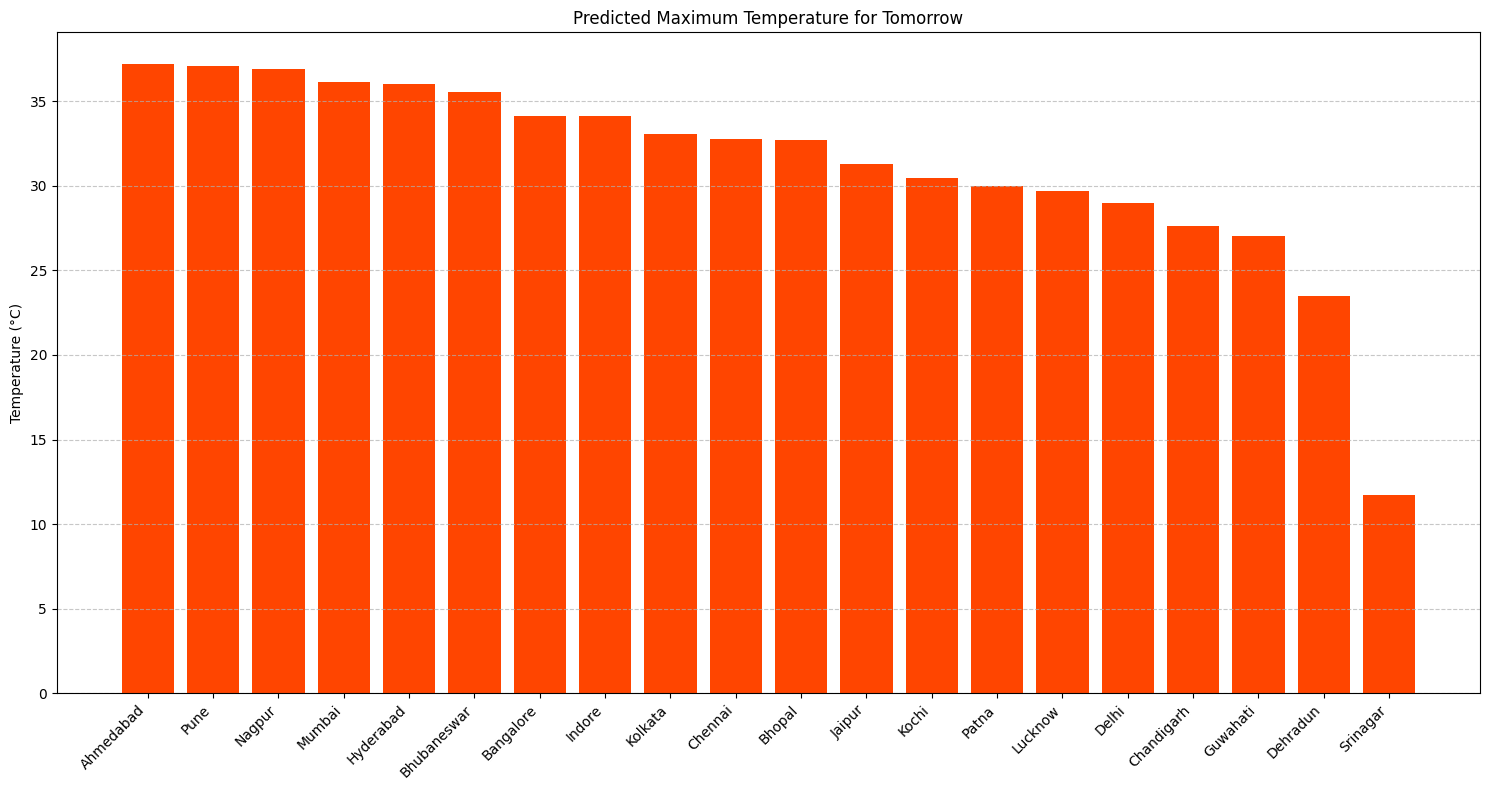

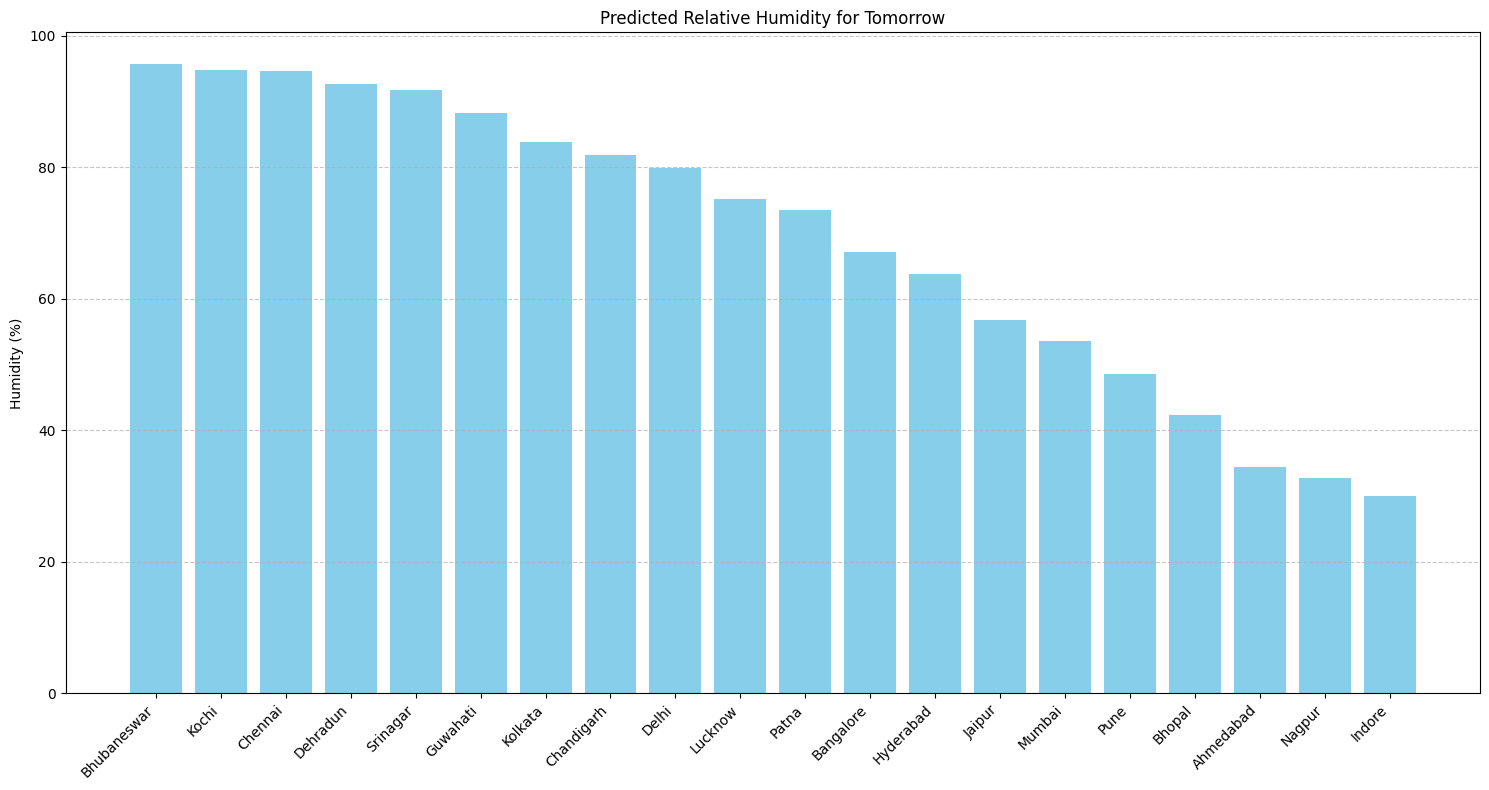

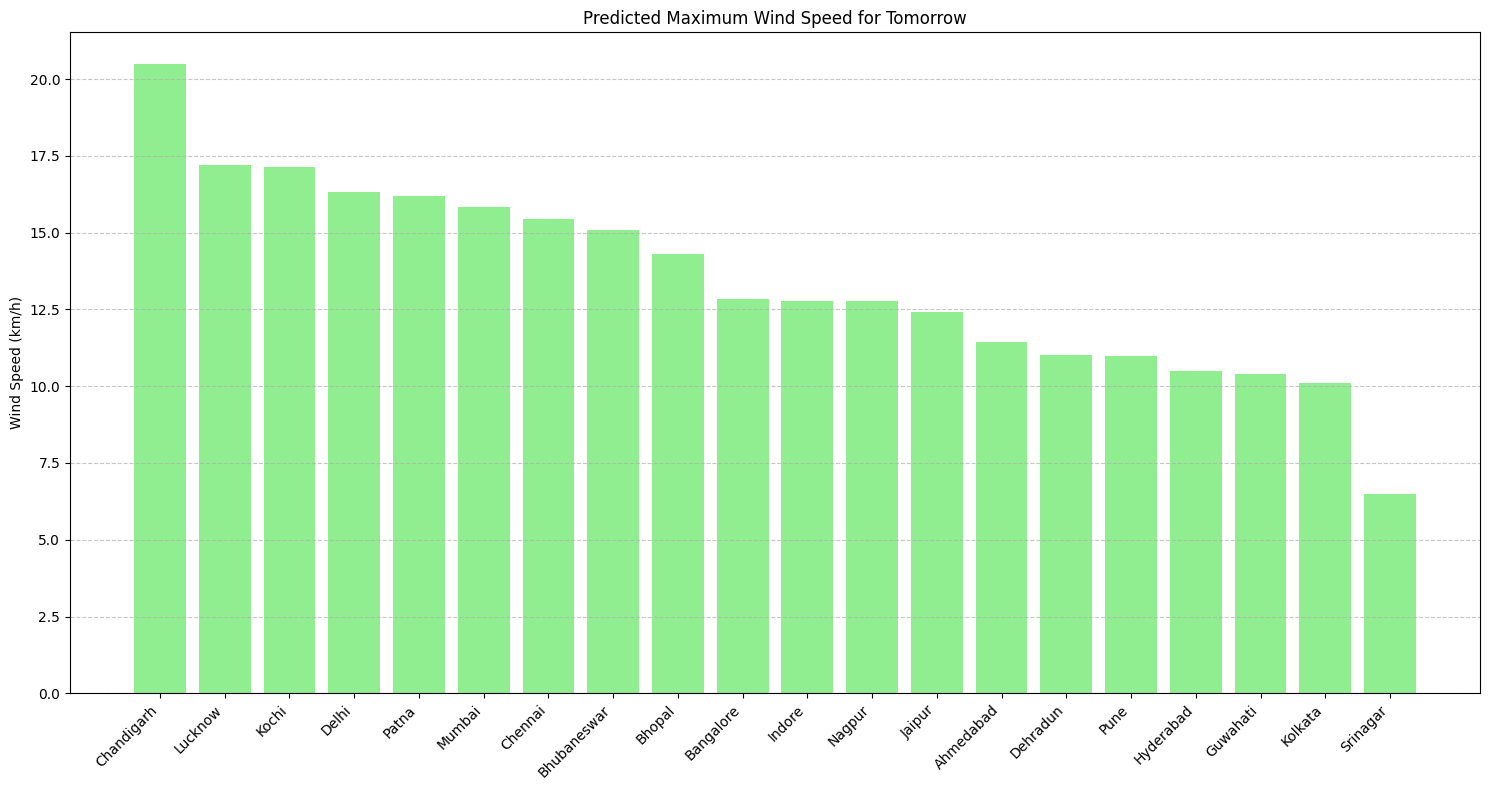

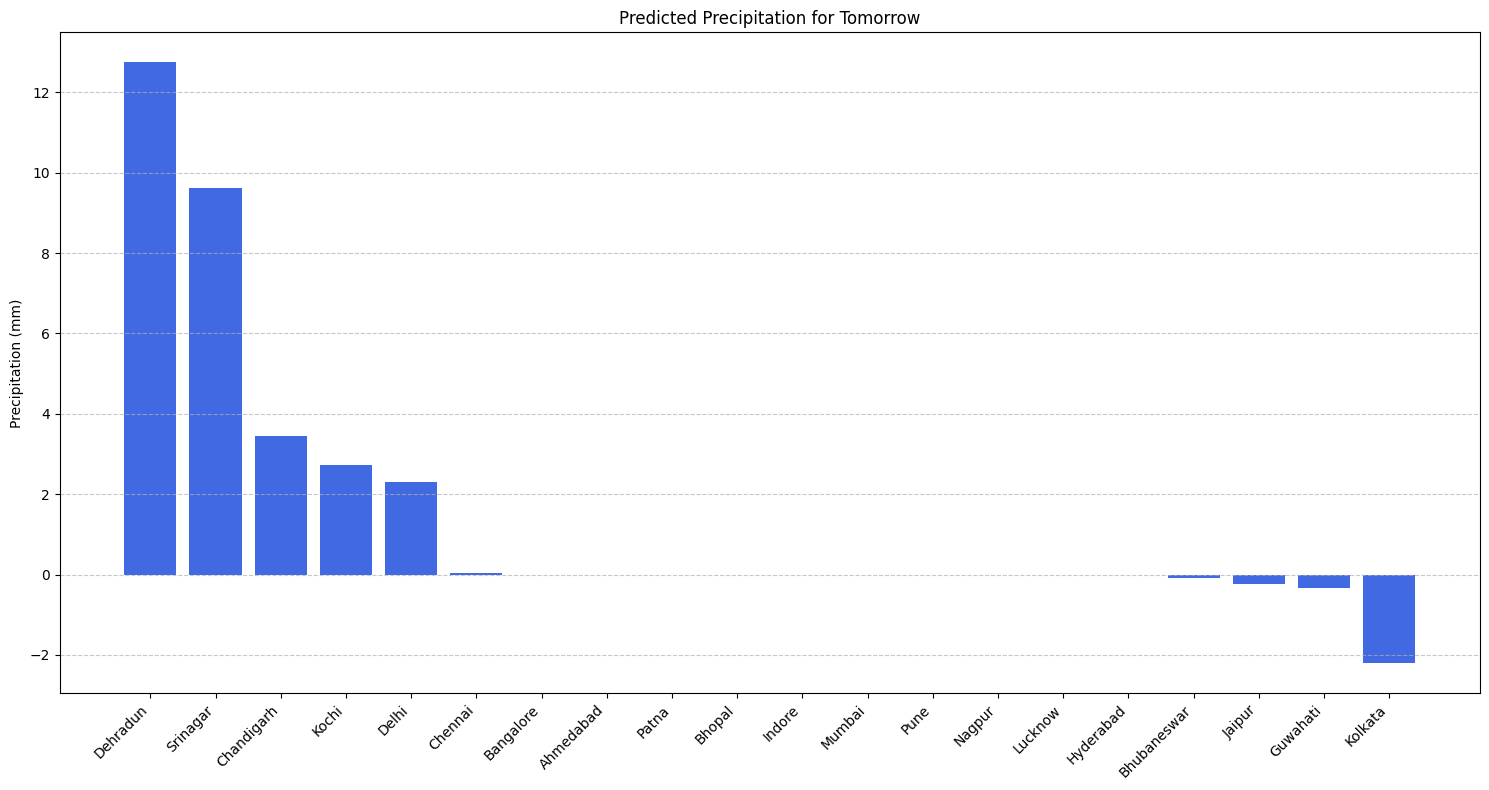

In [87]:
print("Starting historical data collection for 20 Indian cities...")

# Calculate dates (1 month ago until today)
end_date = datetime.now().strftime("%Y-%m-%d")
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
print(f"Collecting data from {start_date} to {end_date}")

all_data = []

for city in cities:
    print(f"Collecting data for {city['name']}...")
    
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={city['lat']}&longitude={city['lon']}" \
          f"&start_date={start_date}&end_date={end_date}" \
          f"&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum," \
          f"windspeed_10m_max,relative_humidity_2m_max"
    
    response = requests.get(url)
    data = response.json()
    
    # Process daily data
    daily_data = data['daily']
    dates = daily_data['time']
    
    # Create day of year and day of week features for time-based patterns
    for i in range(len(dates)):
        date_obj = datetime.strptime(dates[i], "%Y-%m-%d")
        day_of_year = date_obj.timetuple().tm_yday
        day_of_week = date_obj.weekday()
        
        all_data.append({
            'city': city['name'],
            'date': dates[i],
            'temperature_max': daily_data['temperature_2m_max'][i],
            'temperature_min': daily_data['temperature_2m_min'][i],
            'temperature_mean': daily_data['temperature_2m_mean'][i],
            'precipitation': daily_data['precipitation_sum'][i],
            'windspeed': daily_data['windspeed_10m_max'][i],
            'humidity': daily_data['relative_humidity_2m_max'][i],
            'day_of_year': day_of_year,
            'day_of_week': day_of_week
        })
    
    # Be nice to the API - add a short delay between requests
    time.sleep(1)

# Convert to DataFrame
weather_df = pd.DataFrame(all_data)
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Save the raw dataset
weather_df.to_csv('IndiaMeteoTrends-20.csv', index=False)
print(f"Raw data saved to 'IndiaMeteoTrends-20.csv'")

# 3. DATA PREPROCESSING FOR LINEAR REGRESSION
print("\nPreparing data for linear regression models...")

# Create lagged features for each city (previous days' weather)
city_dfs = {}
for city in weather_df['city'].unique():
    city_df = weather_df[weather_df['city'] == city].sort_values('date').copy()
    
    # Create lag features (previous 3 days)
    for lag in range(1, 4):
        city_df[f'temp_max_lag{lag}'] = city_df['temperature_max'].shift(lag)
        city_df[f'temp_min_lag{lag}'] = city_df['temperature_min'].shift(lag)
        city_df[f'precip_lag{lag}'] = city_df['precipitation'].shift(lag)
        city_df[f'wind_lag{lag}'] = city_df['windspeed'].shift(lag)
        city_df[f'humidity_lag{lag}'] = city_df['humidity'].shift(lag)
    
    # Calculate rolling averages (3-day and 7-day)
    city_df['temp_max_roll3'] = city_df['temperature_max'].rolling(window=3).mean()
    city_df['temp_max_roll7'] = city_df['temperature_max'].rolling(window=7).mean()
    city_df['humidity_roll3'] = city_df['humidity'].rolling(window=3).mean()
    
    # Drop rows with NaN values (from lagging and rolling operations)
    city_df = city_df.dropna()
    
    # Store prepared city dataframe
    city_dfs[city] = city_df

# 4. BUILD LINEAR REGRESSION MODELS FOR EACH CITY AND WEATHER PARAMETER
print("\nTraining linear regression models for each city...")

# Dictionary to store models and scalers
models = {}
scalers = {}
metrics = {}
predictions = []

# Weather parameters to predict
weather_params = ['temperature_max', 'temperature_min', 'precipitation', 'windspeed', 'humidity']

for city, city_df in city_dfs.items():
    print(f"Building models for {city}...")
    models[city] = {}
    scalers[city] = {}
    metrics[city] = {}
    
    for param in weather_params:
        # Select features for this parameter
        if param in ['temperature_max', 'temperature_min']:
            # For temperature, use more features
            features = [col for col in city_df.columns if 'lag' in col or 'roll' in col or col in ['day_of_year', 'day_of_week']]
        else:
            # For other params, use specific lag features
            features = [f"{param[:5]}_lag{i}" for i in range(1, 4) if f"{param[:5]}_lag{i}" in city_df.columns]
            features += ['day_of_year', 'day_of_week']
        
        X = city_df[features]
        y = city_df[param]
        
        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        scalers[city][param] = scaler
        
        # Split data for training and validation
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        models[city][param] = model
        
        # Evaluate on validation set
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        
        metrics[city][param] = {
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        }
        
        # Predict next day's weather
        # Get the latest data row
        latest_data = city_df.iloc[-1]
        
        # Prepare features for prediction
        pred_features = {}
        for feature in features:
            if feature in latest_data:
                pred_features[feature] = latest_data[feature]
        
        # Next day will be +1 from the latest date
        next_date = latest_data['date'] + timedelta(days=1)
        next_day_of_year = next_date.timetuple().tm_yday
        next_day_of_week = next_date.weekday()
        
        # Update day features
        if 'day_of_year' in features:
            pred_features['day_of_year'] = next_day_of_year
        if 'day_of_week' in features:
            pred_features['day_of_week'] = next_day_of_week
            
        # Convert to DataFrame and scale
        X_pred = pd.DataFrame([pred_features])
        X_pred_scaled = scaler.transform(X_pred)
        
        # Make prediction
        pred_value = model.predict(X_pred_scaled)[0]
        
        # Store prediction
        predictions.append({
            'city': city,
            'parameter': param,
            'date': next_date.strftime('%Y-%m-%d'),
            'predicted_value': pred_value
        })

# 5. ORGANIZE PREDICTIONS AND VISUALIZE RESULTS
print("\nGenerating prediction visualizations...")

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions)

# Pivot to get a more structured format
pivot_df = pred_df.pivot_table(
    index=['city', 'date'],
    columns='parameter',
    values='predicted_value'
).reset_index()

# Save predictions
pivot_df.to_csv('IndiaMeteoTrends-20_NextDayPredictions.csv', index=False)
print(f"Predictions saved to 'IndiaMeteoTrends-20_NextDayPredictions.csv'")

# Visualize temperature predictions
plt.figure(figsize=(15, 8))
temp_plot = pivot_df.sort_values('temperature_max', ascending=False)
plt.bar(temp_plot['city'], temp_plot['temperature_max'], color='orangered')
plt.xticks(rotation=45, ha='right')
plt.title('Predicted Maximum Temperature for Tomorrow')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('predicted_max_temperature.png')

# Visualize humidity predictions
plt.figure(figsize=(15, 8))
humidity_plot = pivot_df.sort_values('humidity', ascending=False)
plt.bar(humidity_plot['city'], humidity_plot['humidity'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Predicted Relative Humidity for Tomorrow')
plt.ylabel('Humidity (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('predicted_humidity.png')

# Visualize wind speed predictions
plt.figure(figsize=(15, 8))
wind_plot = pivot_df.sort_values('windspeed', ascending=False)
plt.bar(wind_plot['city'], wind_plot['windspeed'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Predicted Maximum Wind Speed for Tomorrow')
plt.ylabel('Wind Speed (km/h)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('predicted_windspeed.png')

# Visualize precipitation predictions
plt.figure(figsize=(15, 8))
precip_plot = pivot_df.sort_values('precipitation', ascending=False)
plt.bar(precip_plot['city'], precip_plot['precipitation'], color='royalblue')
plt.xticks(rotation=45, ha='right')
plt.title('Predicted Precipitation for Tomorrow')
plt.ylabel('Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('predicted_precipitation.png')

# Create a model performance summary
performance_summary = []
for city in metrics:
    for param in metrics[city]:
        performance_summary.append({
            'city': city,
            'parameter': param,
            'MAE': metrics[city][param]['MAE'],
            'RMSE': metrics[city][param]['RMSE'],
            'R²': metrics[city][param]['R²']
        })

perf_df = pd.DataFrame(performance_summary)
perf_df.to_csv('model_performance_metrics.csv', index=False)
print(f"Model performance metrics saved to 'model_performance_metrics.csv'")



print("\nComplete! The IndiaMeteoTrends-20 dataset has been created and analyzed.")
print("Linear regression models have been trained for next-day weather predictions.")
print("Predictions and visualizations have been saved to files.")


# Use Case: Weather forecast and model enhancement using RL techniques

### Also, in long run we see the effects of modality fusion like precipitation, temperatue and other sensory data combined on a single parameter, whether it enhances the accuracy or not.